# Assignment - Ensemble Technique

# 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from numpy import percentile
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns   
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# 2. Read the data as a data frame 

In [2]:
df= pd.read_csv('bank-full.csv') #Reads the csv file in the Data Frame df

In [3]:
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


# 3. Perform basic EDA which should include the following and print out your insights at every step


# 3a. Shape of the data 

In [4]:
shape=df.shape  #Provides the Shape in (Rows, Columns) in the Data Frame df
print('shape of the data frame is =',shape) 

shape of the data frame is = (45211, 17)


# 3b. Data type of each attribute 

In [5]:
i = 0
#Length of the coulmns of the data fram
n=len(df.columns)
#List of all the attribues in the data frame 
List=list(df.columns.values)
print('Data type of each attribute in Data frame:\n')
while i < n:     
    New_List=List[i]
    Data_type=df[New_List].dtype
    print('Data Type of',New_List,'attribute is:',Data_type)
    i=i+1

Data type of each attribute in Data frame:

Data Type of age attribute is: int64
Data Type of job attribute is: object
Data Type of marital attribute is: object
Data Type of education attribute is: object
Data Type of default attribute is: object
Data Type of balance attribute is: int64
Data Type of housing attribute is: object
Data Type of loan attribute is: object
Data Type of contact attribute is: object
Data Type of day attribute is: int64
Data Type of month attribute is: object
Data Type of duration attribute is: int64
Data Type of campaign attribute is: int64
Data Type of pdays attribute is: int64
Data Type of previous attribute is: int64
Data Type of poutcome attribute is: object
Data Type of Target attribute is: object


Attribute Information: 

1. age (numeric) 

2. job : type of job (categorical: 'admin.','bluecollar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown') 

3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) 

4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','univers ity.degree','unknown') 

5. default: has credit in default? (categorical: 'no','yes','unknown') 

6. balance: average yearly balance, in euros (numeric) 

7. housing: has housing loan? (categorical: 'no','yes','unknown') 

8. loan: has personal loan? (categorical: 'no','yes','unknown') 

9. contact: contact communication type (categorical: 'cellular','telephone') 

10. day: last contact day of the month (numeric 1 -31) 

11. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') 

12. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) 

14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) 

15. previous: number of contacts performed before this campaign and for this client (numeric) 

16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') 

17. target: has the client subscribed a term deposit? (binary: "yes","no") 
 

As per the above attribute information, we can see few of the data types of the attributes 'job', 'martial', 'education', 'default','housing', 'loan', 'contact', 'month', 'poutcome'and 'Target' needs to be updated as Category Data type

In [6]:
i = 0
n=len(df.columns)
List=list(df.columns.values)
while i < n:     
    New_List=List[i]
    Data_type=df[New_List].dtype
    if (Data_type=="object"):
        df = df.astype({New_List:'category'}) 
        print(New_List, 'attribute has been converted to be category data type')
    i=i+1

job attribute has been converted to be category data type
marital attribute has been converted to be category data type
education attribute has been converted to be category data type
default attribute has been converted to be category data type
housing attribute has been converted to be category data type
loan attribute has been converted to be category data type
contact attribute has been converted to be category data type
month attribute has been converted to be category data type
poutcome attribute has been converted to be category data type
Target attribute has been converted to be category data type


In [7]:
#Checking the data types of the attributes post conversion
df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

# 3c. Checking the presence of missing values 

In [8]:
print('Checking the presence of missing values in the Data frame:\n')
null_value_count = df.isnull().sum() 

i = 0

#Length of the coulmns of the data fram
n=len(df.columns)

#List of all the attribues in the data frame 
List=list(df.columns.values)

while i < n:   
    New_List=List[i]
    print('There are',null_value_count[i],'null values in',New_List,'attribute in the dataframe')
    i=i+1

Checking the presence of missing values in the Data frame:

There are 0 null values in age attribute in the dataframe
There are 0 null values in job attribute in the dataframe
There are 0 null values in marital attribute in the dataframe
There are 0 null values in education attribute in the dataframe
There are 0 null values in default attribute in the dataframe
There are 0 null values in balance attribute in the dataframe
There are 0 null values in housing attribute in the dataframe
There are 0 null values in loan attribute in the dataframe
There are 0 null values in contact attribute in the dataframe
There are 0 null values in day attribute in the dataframe
There are 0 null values in month attribute in the dataframe
There are 0 null values in duration attribute in the dataframe
There are 0 null values in campaign attribute in the dataframe
There are 0 null values in pdays attribute in the dataframe
There are 0 null values in previous attribute in the dataframe
There are 0 null values 

In [9]:
# information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


Observation: There are 45211 rows and 17 columns in the dataframe. None of the columns have a null or NaN value.

In [10]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome','Target']
for column in categorcial_variables:
    print(df[column].value_counts(),'\n')

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

no     44396
yes      815
Name: default, dtype: int64 

yes    25130
no     20081
Name: housing, dtype: int64 

no     37967
yes     7244
Name: loan, dtype: int64 

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64 

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome

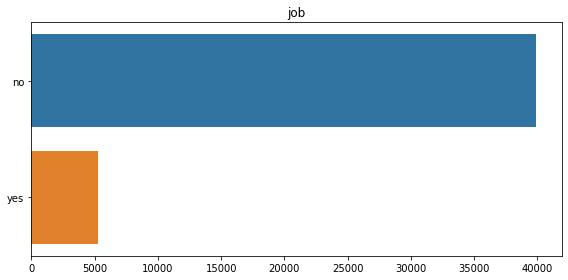

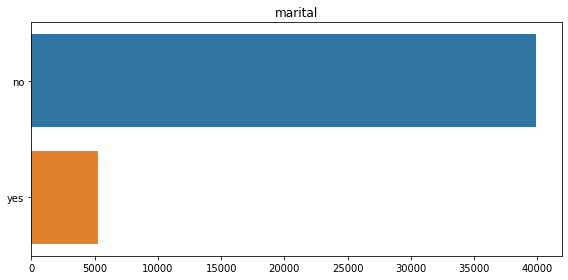

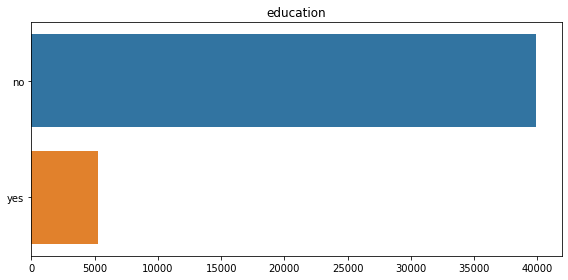

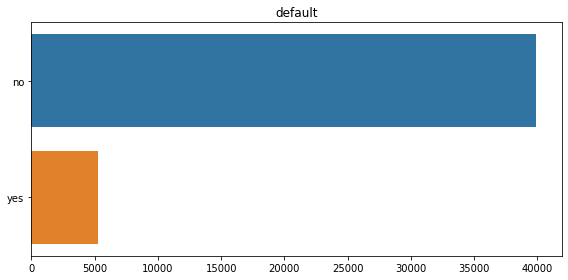

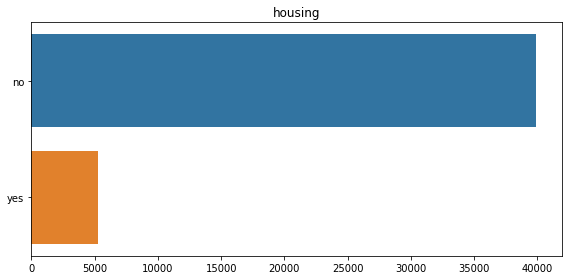

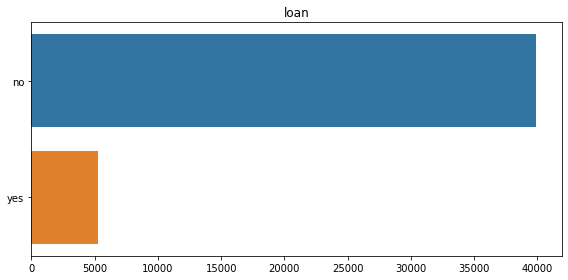

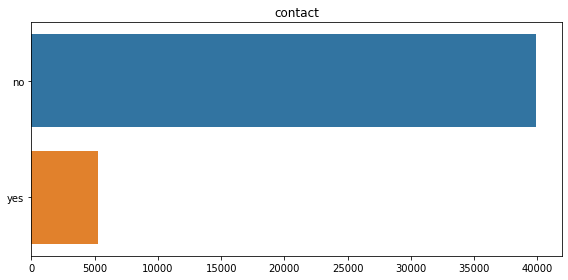

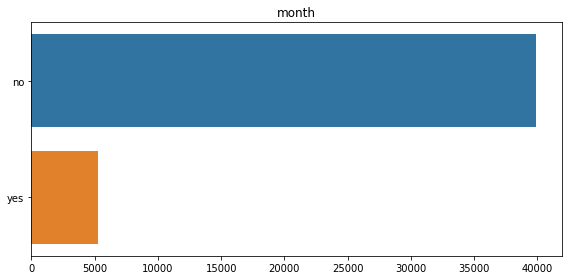

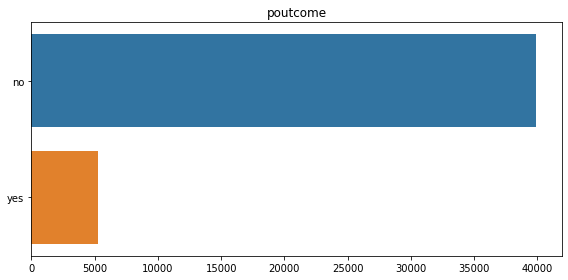

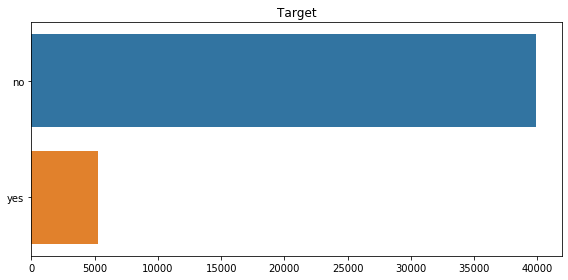

In [11]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                         'poutcome','Target']
for colummn in categorcial_variables:
    plt.figure(figsize=(8,4))
    sns.barplot(df[column].value_counts().values, df[column].value_counts().index)
    plt.title(colummn)
    plt.tight_layout()

Observation: Based on the above data and graphs, it is seen that the attributes - job, education, contact and poutcome have unknown data in them. We would need to encode this data.

# 3d. 5 Point summary of numerical attributes 

In [12]:
# 5 point summary of numerical attributes
i = 0
 
# New dataframe which only contains the numeric attribues
new_df=df._get_numeric_data()

#Length of the coulmns of the new data frame which only contains the numeric attributes
n=len(new_df.columns)

#List of all the attribues in the new data frame 
List=list(new_df.columns.values)
 
print('5 point summary of numerical attributes:\n')

while i < n:   
    
    New_List=List[i]

    #calculate the quartiles at Percentile '0' for min value, '25' for Q1, '50' for median, '75' for Q3, and '100' for Max
    quartiles = percentile(df[New_List], [0,25, 50, 75,100])
    
    # print the 5 point summary of numerical attributes
    print(New_List,'attribute:')
    print('Min of',New_List,'is: %.3f' % quartiles[0])
    print('Q1 of',New_List,'is: %.3f' % quartiles[1])
    print('Median of',New_List,'is: %.3f' % quartiles[2])
    print('Q3 of',New_List,'is: %.3f' % quartiles[3])
    print('Max of',New_List,'is: %.3f' % quartiles[4],'\n')
    
    i=i+1

5 point summary of numerical attributes:

age attribute:
Min of age is: 18.000
Q1 of age is: 33.000
Median of age is: 39.000
Q3 of age is: 48.000
Max of age is: 95.000 

balance attribute:
Min of balance is: -8019.000
Q1 of balance is: 72.000
Median of balance is: 448.000
Q3 of balance is: 1428.000
Max of balance is: 102127.000 

day attribute:
Min of day is: 1.000
Q1 of day is: 8.000
Median of day is: 16.000
Q3 of day is: 21.000
Max of day is: 31.000 

duration attribute:
Min of duration is: 0.000
Q1 of duration is: 103.000
Median of duration is: 180.000
Q3 of duration is: 319.000
Max of duration is: 4918.000 

campaign attribute:
Min of campaign is: 1.000
Q1 of campaign is: 1.000
Median of campaign is: 2.000
Q3 of campaign is: 3.000
Max of campaign is: 63.000 

pdays attribute:
Min of pdays is: -1.000
Q1 of pdays is: -1.000
Median of pdays is: -1.000
Q3 of pdays is: -1.000
Max of pdays is: 871.000 

previous attribute:
Min of previous is: 0.000
Q1 of previous is: 0.000
Median of prev

In [13]:
#Using df.describe for the 5 point summary of numerical attributes
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


pdays value is -1 for most of the data points

In [14]:
numeric_variables = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for column in numeric_variables:
    print(df[column].value_counts(),'\n')

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64 

0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64 

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64 

124     188
90      184
89      177
122     175
104     175
       ... 
2150      1
1970      1
1906      1
1842      1
2015      1
Name: duration, Length: 1573, dtype: int64 

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9  

Observation: The attribute pdays has negative values. This would need to be replaced since there are 36954 rows with a value of -1

# 3e. Checking the presence of outliers

In [15]:
i = 0

# New dataframe which only contains the numeric attribues
new_df=df._get_numeric_data()

#List of all the attribues in the new data frame 
List=list(new_df.columns.values)

n=len(List)
while i < n:   
    New_List=List[i]
    minimum,q1,q3,maximum= np.percentile(df[New_List],[0,25,75,100])
    iqr=q3-q1
    lower_value=q1-(1.5 * iqr)
    upper_value=q3+(1.5 * iqr)
    if ((minimum<lower_value) or (maximum>upper_value)):
        outliers = [x for x in df[New_List] if x < lower_value or x > upper_value]
        print('Identified outliers for',New_List,'out of', len(df[New_List]),'records: %d' % len(outliers))
    else:
        print('There is no outlier for the attribute',New_List)        
    i=i+1 

Identified outliers for age out of 45211 records: 487
Identified outliers for balance out of 45211 records: 4729
There is no outlier for the attribute day
Identified outliers for duration out of 45211 records: 3235
Identified outliers for campaign out of 45211 records: 3064
Identified outliers for pdays out of 45211 records: 8257
Identified outliers for previous out of 45211 records: 8257


# Checking the presence of outliers of numerical attributes using box plot

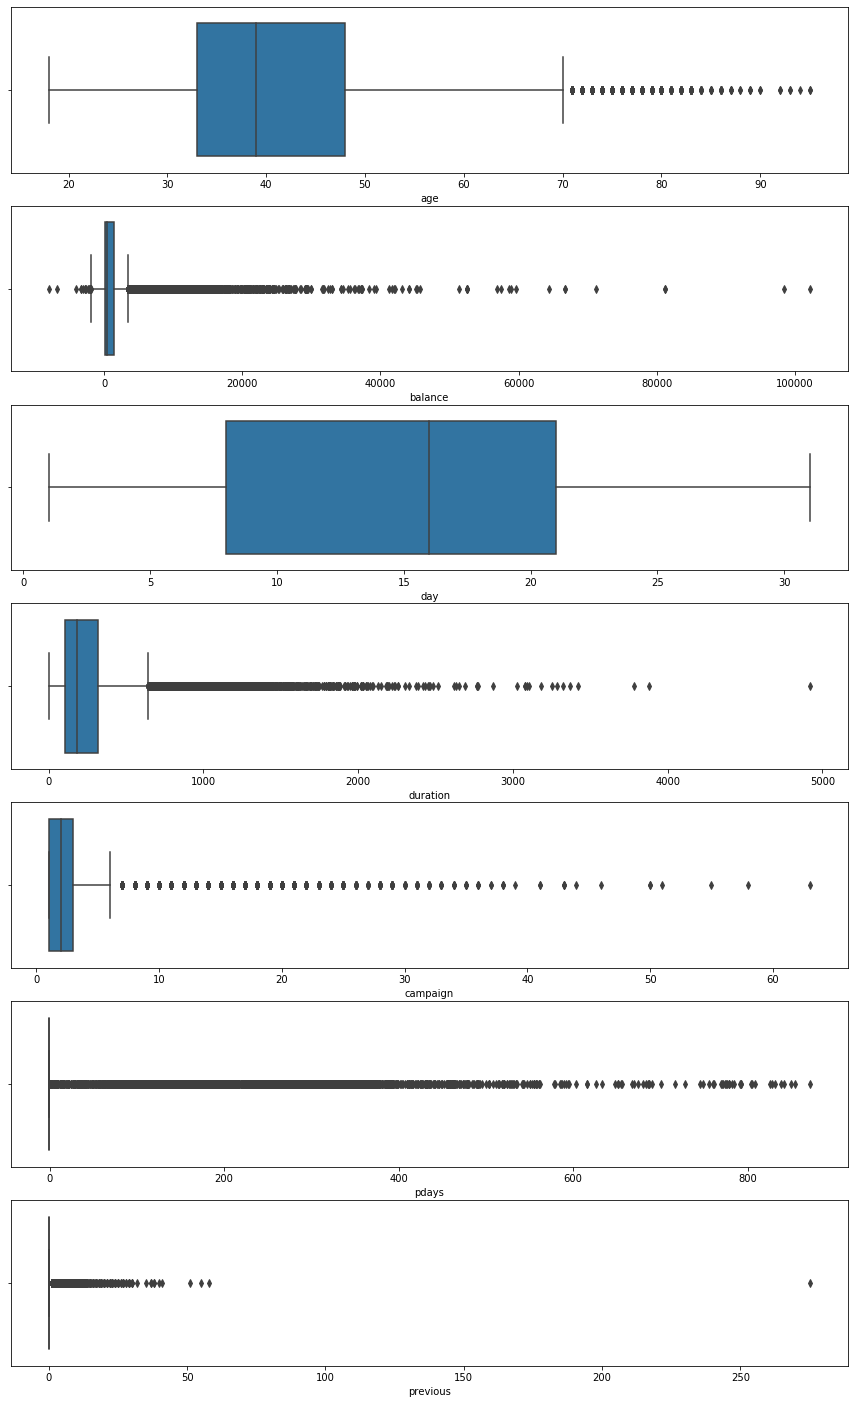

In [16]:
#Checking for the outliers using boxplot
plt.figure(figsize= (15,25))

plt.subplot(7,1,1)
sns.boxplot(x=df.age)

plt.subplot(7,1,2)
sns.boxplot(x=df.balance)

plt.subplot(7,1,3)
sns.boxplot(x=df.day)

plt.subplot(7,1,4)
sns.boxplot(x=df.duration)

plt.subplot(7,1,5)
sns.boxplot(x=df.campaign)

plt.subplot(7,1,6)
sns.boxplot(x=df.pdays)

plt.subplot(7,1,7)
sns.boxplot(x=df.previous)

plt.show()


Insights:            
Outliers are detected using IQR (Inter Quartile Range). From the above data, it can be seen that 'age', balance, duration and 'campaign' have outliers.    
We have nearly 18% of outliers in Previous and pDays, and 6-10% Outliers in Campaign, Duration and balance, and 1% outlier in Age               
But we also see that the maximum value of these outliers are not so unrealistic (eg: (max('age')=95 and max('campaign')=63). Hence, we need not remove them since the prediction model should represent the real world. This improves the generalizability of the model and makes it robust for real world situations. The outliers, therefore, are not removed.

In [17]:
print('Measure of skewness of Quantitative Data')
i = 0

# New dataframe which only contains the numeric attribues
new_df=df._get_numeric_data()

#List of all the attribues in the new data frame 
List=list(new_df.columns.values)

n=len(List)
while i < n:   
    New_List=List[i]
    skew=df[New_List].skew(axis = 0, skipna = True)
    if (skew==0):
        conclusion='Data is normally distributed or Symmetric'
    elif(skew<0):
        conclusion='Data is Left-Skewed'
    else:
        conclusion='Data is Right-Skewed'     
    print('Skewness of',New_List,'is: %.3f'%skew,'and',conclusion)
    i=i+1

Measure of skewness of Quantitative Data
Skewness of age is: 0.685 and Data is Right-Skewed
Skewness of balance is: 8.360 and Data is Right-Skewed
Skewness of day is: 0.093 and Data is Right-Skewed
Skewness of duration is: 3.144 and Data is Right-Skewed
Skewness of campaign is: 4.899 and Data is Right-Skewed
Skewness of pdays is: 2.616 and Data is Right-Skewed
Skewness of previous is: 41.846 and Data is Right-Skewed


# Univariate Analysis

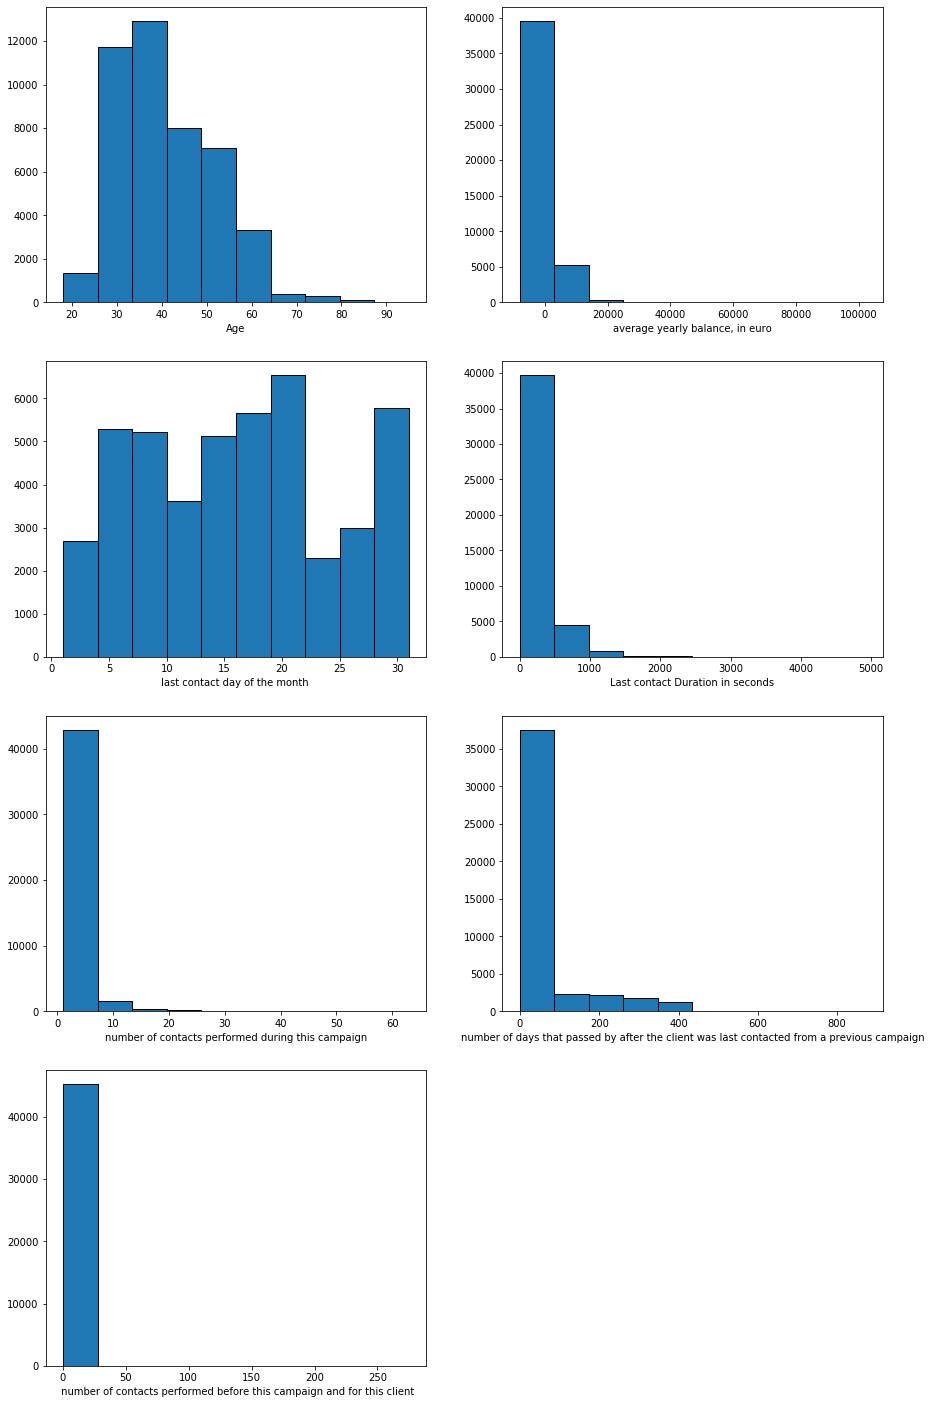

In [18]:
# Histogram Plot of Quantitative Data
plt.figure(figsize= (15,25))

plt.subplot(4,2,1)
plt.hist(df['age'],edgecolor = 'black')
plt.xlabel('Age')

plt.subplot(4,2,2)
plt.hist(df['balance'],edgecolor = 'black')
plt.xlabel('average yearly balance, in euro')

plt.subplot(4,2,3)
plt.hist(df['day'],edgecolor = 'black')
plt.xlabel('last contact day of the month ')

plt.subplot(4,2,4)
plt.hist(df['duration'],edgecolor = 'black')
plt.xlabel('Last contact Duration in seconds')

plt.subplot(4,2,5)
plt.hist(df['campaign'],edgecolor = 'black')
plt.xlabel('number of contacts performed during this campaign')

plt.subplot(4,2,6)
plt.hist(df['pdays'],edgecolor = 'black')
plt.xlabel('number of days that passed by after the client was last contacted from a previous campaign')

plt.subplot(4,2,7)
plt.hist(df['previous'],edgecolor = 'black')
plt.xlabel(' number of contacts performed before this campaign and for this client')

plt.show()

Insights:    
Age is Right-Skewed         
Balance is Right-Skewed                 
Day is Right-Skewed                  
Duration is Right-Skewed and Last contact duration was 0 for most of data points             

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


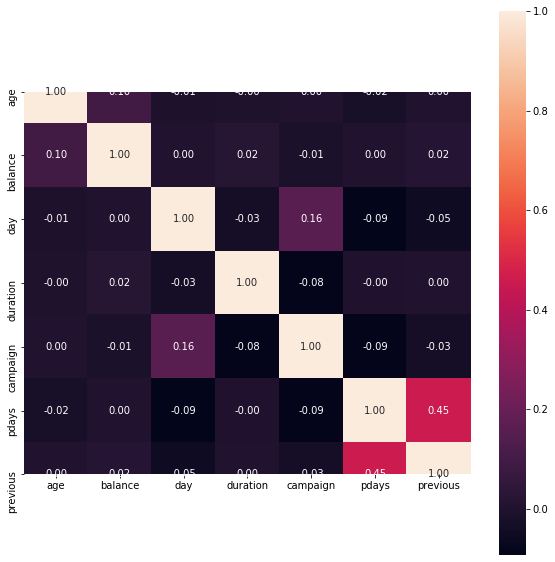

In [19]:
corr = df.corr(method='pearson')
print(corr)

plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,square=True,fmt='.2f')

Insights:             
Previous and pdays is moderately correlated and there is a slight correlation between day and campaign

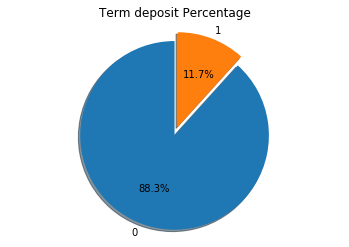

In [20]:
# Pie chart distribution for Target variable 
labels = [0,1]
sizes=df['Target'].value_counts()
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Term deposit Percentage")
plt.show()

We have only 11.7% of data where the term deposit is subscribed by the customer, it shows that there is a class imbalance and it will impact the overall model performance

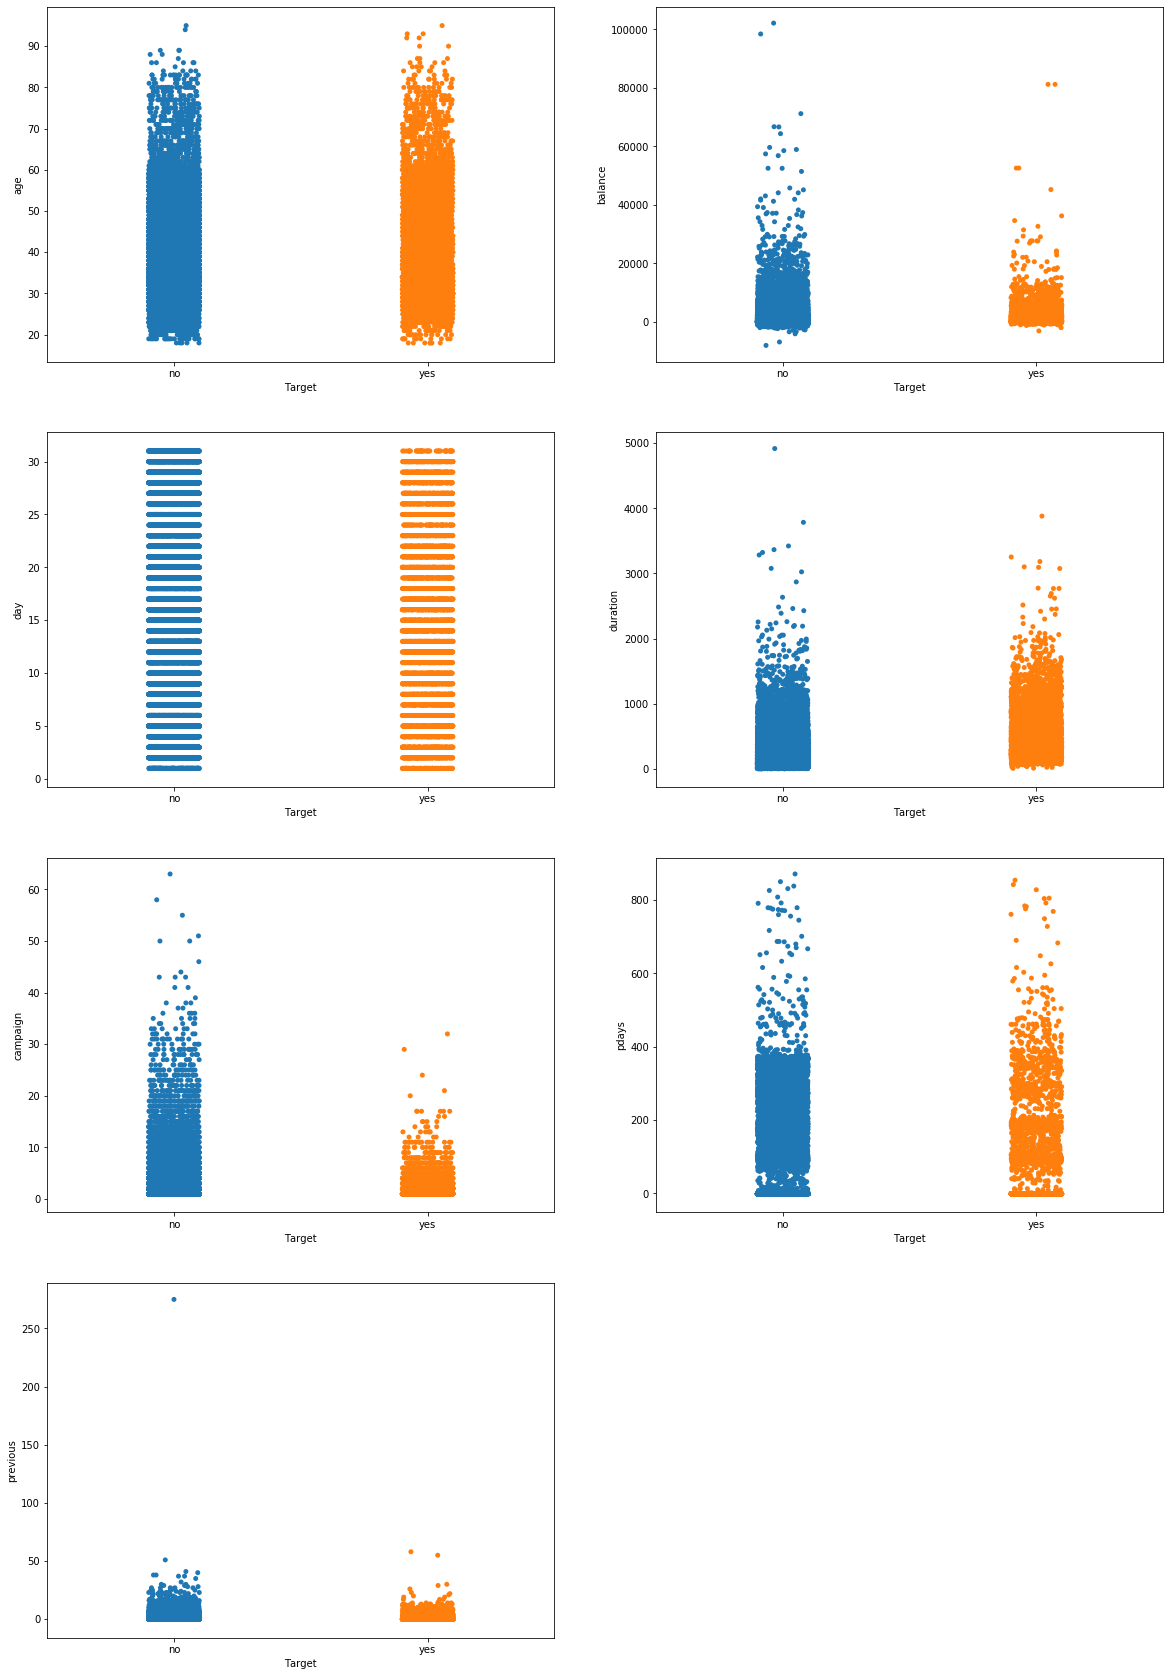

In [21]:
#Distribution of Quantitaive data against Target
plt.figure(figsize= (20,30))

plt.subplot(4,2,1)
sns.stripplot(df['Target'],df['age'])

plt.subplot(4,2,2)
sns.stripplot(df['Target'],df['balance'])

plt.subplot(4,2,3)
sns.stripplot(df['Target'],df['day'])

plt.subplot(4,2,4)
sns.stripplot(df['Target'],df['duration'])

plt.subplot(4,2,5)
sns.stripplot(df['Target'],df['campaign'])

plt.subplot(4,2,6)
sns.stripplot(df['Target'],df['pdays'])

plt.subplot(4,2,7)
sns.stripplot(df['Target'],df['previous'])

plt.show()

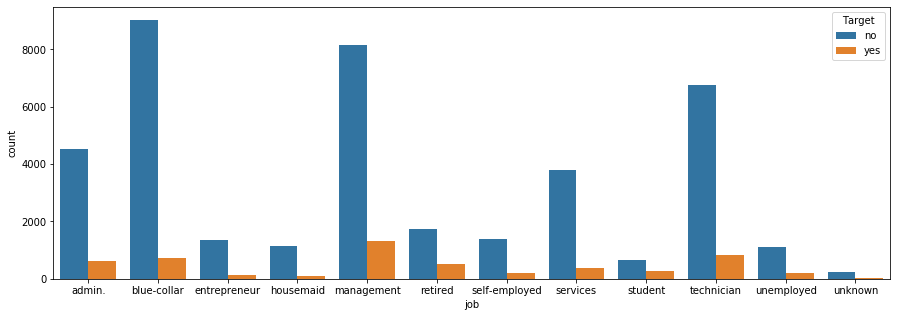

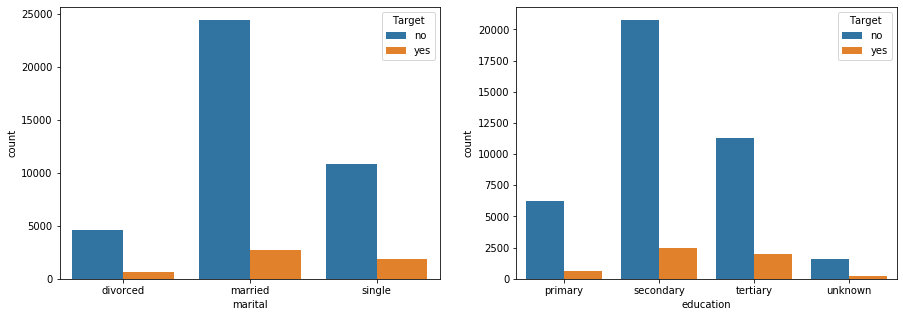

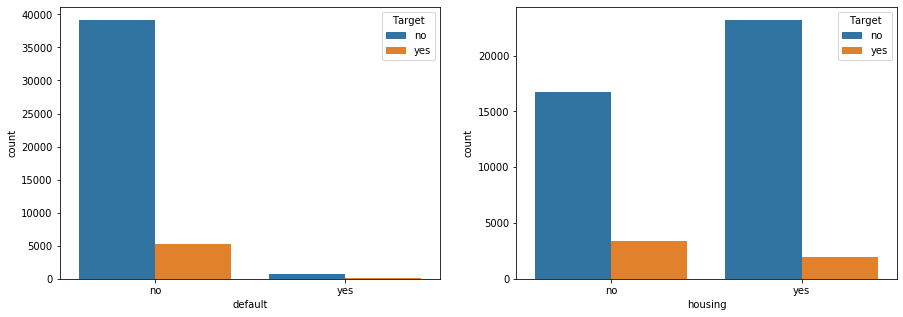

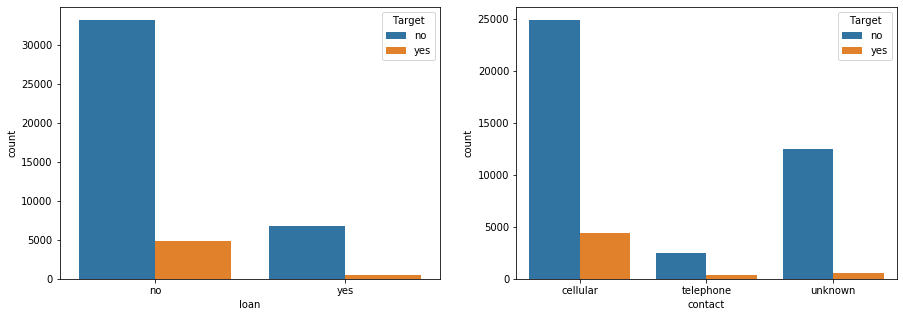

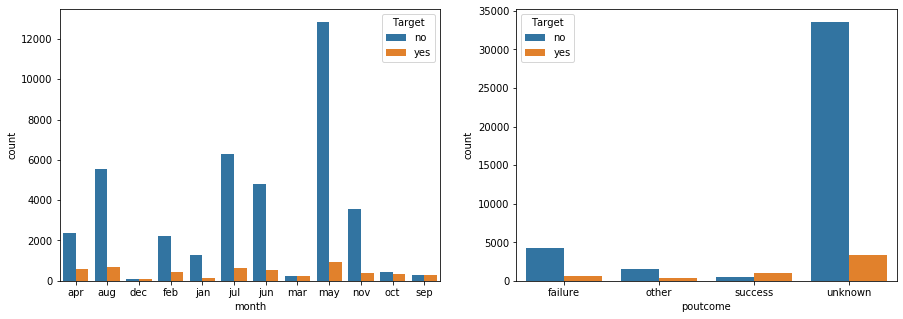

In [22]:
#Categorical data distribution against Target

plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
sns.countplot(x='job',data=df,hue='Target')

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x='marital',data=df,hue='Target')

plt.subplot(1, 2, 2)
sns.countplot(x='education',data=df,hue='Target')

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x='default',data=df,hue='Target')

plt.subplot(1, 2, 2)
sns.countplot(x='housing',data=df,hue='Target')

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x='loan',data=df,hue='Target')

plt.subplot(1, 2, 2)
sns.countplot(x='contact',data=df,hue='Target')

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x='month',data=df,hue='Target')

plt.subplot(1, 2, 2)
sns.countplot(x='poutcome',data=df,hue='Target')

plt.show()

Observation:     

Based on the above plots, we can see that people with secondary and tertiary education have more chances of term deposit subscription.             
More subscriptions are seen during the month of April, May, June, July, August. Bank should have the next campaign during these months.                
The plot shows that enterpreneurs, unemployed, housemaids, self-employed have a lesser chance of opting for a term deposit. We would need to concentrate on other sectors.               
Attributes housing, loan, contact, poutcome are significant in determining if the person would subscribe for a term deposit.

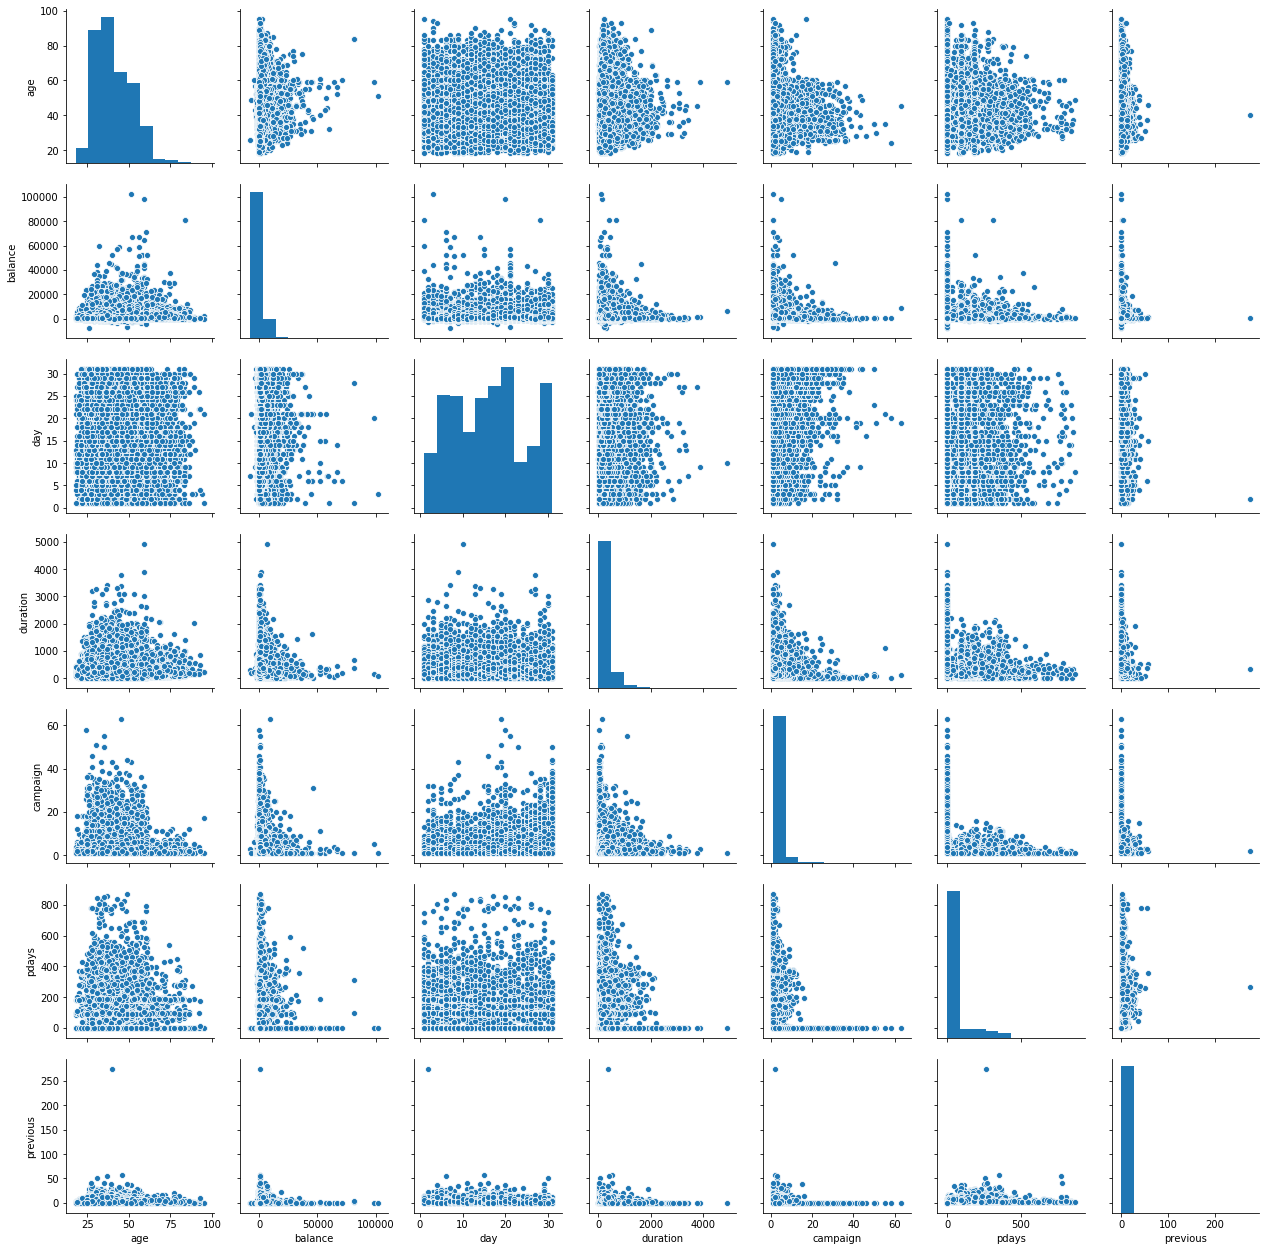

In [23]:
#Pair Plot
sns.pairplot(df)
plt.show()

# 4. Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc. 

 Data Imputation and Encoding of Categorical Variables

In [24]:
pd.crosstab(df['pdays'],df['previous'])

previous,0,1,2,3,4,5,6,7,8,9,...,32,35,37,38,40,41,51,55,58,275
pdays,,,,,,,,,,,,,,,,,,,,,
-1,36954,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5,1,2,0,1,2,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,14,8,7,1,4,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
842,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
850,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Observation: From the above table, it is seen that the attribute pdays is -1 when the client has not been contacted previously(previous=0). So we could replace the negative value in pdays with 0.

In [25]:
df.loc[df['pdays'] == -1, 'pdays'] = 0

In [26]:
pd.crosstab(df['pdays'],df['previous'])

previous,0,1,2,3,4,5,6,7,8,9,...,32,35,37,38,40,41,51,55,58,275
pdays,,,,,,,,,,,,,,,,,,,,,
0,36954,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5,1,2,0,1,2,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,14,8,7,1,4,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
842,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
850,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#One Hot encoding/Labeling
Category_List=['job','marital','education','default','housing','loan','contact','month','poutcome','Target']

i = 0
n=len(Category_List)
while i < n:
    New_List=Category_List[i]
    print(New_List,'attribute details:\n',df[New_List].value_counts(),'\n')
    i=i+1

job attribute details:
 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

marital attribute details:
 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

education attribute details:
 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

default attribute details:
 no     44396
yes      815
Name: default, dtype: int64 

housing attribute details:
 yes    25130
no     20081
Name: housing, dtype: int64 

loan attribute details:
 no     37967
yes     7244
Name: loan, dtype: int64 

contact attribute details:
 cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

month attribute details:
 may    13766
jul     6895
aug     6247
jun     53

In [28]:
replaceStruct = {
                 "education":     {"primary": 1,"secondary": 2 ,"tertiary": 3 ,"unknown": 4 },
                 "month": {"jan": 1, "feb": 2,"mar": 3,"apr": 4,"may": 5,"jun": 6,"jul": 7,"aug": 8,"sep": 9,"oct": 10,"nov": 11,"dec": 12},
                 "default":     {"no": 1, "yes": 2 } ,
                 "housing":     {"no": 1, "yes": 2 },
                "loan":     {"no": 1, "yes": 2 },
                "poutcome":     {"success": 1, "failure": 2,"other": 3,"unknown": 4 },
                 "Target":     {"no": 0, "yes": 1 } 
                    }

oneHotCols=["contact","marital","job"]

In [29]:
df=df.replace(replaceStruct)
df=pd.get_dummies(df, columns=oneHotCols)
df.head(10)

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,3,1,2143,2,1,5,5,261,1,...,0,0,1,0,0,0,0,0,0,0
1,44,2,1,29,2,1,5,5,151,1,...,0,0,0,0,0,0,0,1,0,0
2,33,2,1,2,2,2,5,5,76,1,...,1,0,0,0,0,0,0,0,0,0
3,47,4,1,1506,2,1,5,5,92,1,...,0,0,0,0,0,0,0,0,0,0
4,33,4,1,1,1,1,5,5,198,1,...,0,0,0,0,0,0,0,0,0,1
5,35,3,1,231,2,1,5,5,139,1,...,0,0,1,0,0,0,0,0,0,0
6,28,3,1,447,2,2,5,5,217,1,...,0,0,1,0,0,0,0,0,0,0
7,42,3,2,2,2,1,5,5,380,1,...,1,0,0,0,0,0,0,0,0,0
8,58,1,1,121,2,1,5,5,50,1,...,0,0,0,1,0,0,0,0,0,0
9,43,2,1,593,2,1,5,5,55,1,...,0,0,0,0,0,0,0,1,0,0


Remove the attribute duration as per the input data description since it highly affects the Target and should be used only for benchmarking and not for predictive modelling.

In [30]:
x=df.drop(['Target','duration'],axis=1)
y=df['Target']
x_train_df,x_test_df,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [31]:
x_train_df

,age,education,default,balance,housing,loan,day,month,campaign,pdays,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
6149,32,2,2,-238,2,1,27,5,1,0,...,0,0,0,0,0,0,0,0,0,0
12403,34,2,1,-478,2,2,27,6,4,0,...,0,0,0,0,0,0,0,0,0,0
21645,32,2,1,266,2,1,19,8,2,0,...,0,0,0,0,0,0,0,1,0,0
29580,36,2,2,13,1,2,3,2,4,0,...,0,0,0,0,0,0,0,0,0,0
31245,23,2,1,486,1,1,3,3,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,50,3,1,1830,1,1,14,5,3,0,...,0,0,0,0,0,0,0,1,0,0
32511,34,3,1,528,2,1,17,4,2,0,...,0,0,1,0,0,0,0,0,0,0
5192,48,3,1,4191,1,1,21,5,6,0,...,0,0,1,0,0,0,0,0,0,0
12172,45,4,1,1783,1,1,20,6,11,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
y_train

6149     0
12403    0
21645    0
29580    0
31245    0
        ..
43723    0
32511    0
5192     0
12172    0
33003    0
Name: Target, Length: 31647, dtype: int64

In [33]:
#Checking the split of the data
print("{0:0.2f}% data is in training set".format((len(x_train_df)/len(df)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test_df)/len(df)) * 100))

70.00% data is in training set
30.00% data is in test set


In [34]:
print("Original Target True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['Target'] == 1]), (len(df.loc[df['Target'] == 1])/len(df)) * 100))
print("Original Target False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['Target'] == 0]), (len(df.loc[df['Target'] == 0])/len(df)) * 100))
print("")
print("Training Target True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train == 1])/len(y_train)) * 100))
print("Training Target False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train == 0])/len(y_train)) * 100))
print("")
print("Test Target True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test == 1])/len(y_test)) * 100))
print("Test Target False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test == 0])/len(y_test)) * 100))
print("")

Original Target True Values    : 5289 (11.70%)
Original Target False Values   : 39922 (88.30%)

Training Target True Values    : 3738 (11.81%)
Training Target False Values   : 27909 (88.19%)

Test Target True Values        : 1551 (11.43%)
Test Target False Values       : 12013 (88.57%)



Preprocessing the data using the Standard scaler

In [35]:
#transformer = RobustScaler().fit(x_train_df)
#x_train=transformer.transform(x_train_df)

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(x_train_df)
x_train = pd.DataFrame(scaled_df)
#print(x_train)

In [36]:
#test_transformer=RobustScaler().fit(x_test_df)
#x_test=transformer.transform(x_test_df)

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(x_test_df)
x_test = pd.DataFrame(scaled_df)
#print(x_test) 

# 5. Train a few standard classification algorithms, note and comment on their performances across different classification metrics.

# 5a.Decision Tree Model

In [37]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [38]:
# Decision Tree score
print('Train Data Score :',np.round(dTree.score(x_train, y_train),4))
print('Test Data Score :',np.round(dTree.score(x_test, y_test),4))

Train Data Score : 1.0
Test Data Score : 0.8298


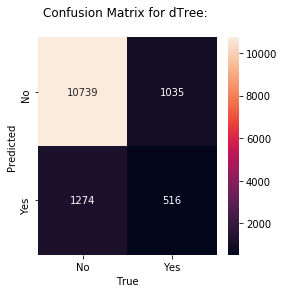

In [39]:
#make predictions
pred_test_dTree = dTree.predict(x_test)

#Confusion Matrix
dTree_cm_test = pd.DataFrame(confusion_matrix(y_test,pred_test_dTree).T,index=['No', 'Yes'], columns=['No', 'Yes'])
dTree_cm_test.index.name = "Predicted"
dTree_cm_test.columns.name = "True"
dTree_cm_test

plt.figure(figsize = (4,4))
plt.title("Confusion Matrix for dTree: \n")
ax=sns.heatmap(dTree_cm_test, annot=True,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# Reducing over fitting (Regularization)

In [40]:
i=1
max_test_score=0
train_score=0
best_max_depth_value=0
while i<=30:
    dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = i, random_state=1)
    dTreeR.fit(x_train, y_train) 

    if (dTreeR.score(x_test, y_test)>=max_test_score):
        best_max_depth_value=i
        max_test_score=dTreeR.score(x_test, y_test)
        train_score=dTreeR.score(x_train, y_train)
        
    i=i+1
 
print('best max_depth value for higher test data score is :',best_max_depth_value)

best max_depth value for higher test data score is : 3


In [41]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = best_max_depth_value, random_state=1)
dTreeR.fit(x_train, y_train) 
dtreeR_train_score = np.round(dTreeR.score(x_train, y_train),4)
dtreeR_test_score = np.round(dTreeR.score(x_test, y_test),4)
print('Train Data Score :',np.round(dTreeR.score(x_train, y_train),4))
print('Test Data Score :',np.round(dTreeR.score(x_test, y_test),4))

Train Data Score : 0.8922
Test Data Score : 0.8958


In [42]:
# importance of features in the tree building 

pd.DataFrame.sort_values(pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = x_train_df.columns),
                      by='Imp',ascending=False)

,Imp
poutcome,0.754687
age,0.125467
contact_unknown,0.084877
housing,0.019173
campaign,0.007095
day,0.004651
pdays,0.004051
job_services,0.000000
job_student,0.000000
job_admin.,0.000000


The metrics with higher importance 'poutcome'

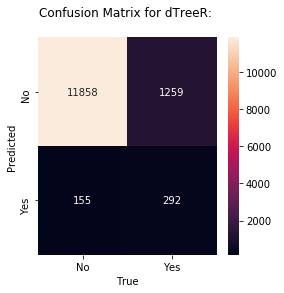

In [43]:
#make predictions
pred_test_dTreeR = dTreeR.predict(x_test)

#Confusion Matrix
dTree_cm_testR = pd.DataFrame(confusion_matrix(y_test,pred_test_dTreeR).T,index=['No', 'Yes'], columns=['No', 'Yes'])
dTree_cm_testR.index.name = "Predicted"
dTree_cm_testR.columns.name = "True"
dTree_cm_testR

plt.figure(figsize = (4,4))
plt.title("Confusion Matrix for dTreeR: \n")
ax=sns.heatmap(dTree_cm_testR, annot=True,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [44]:
# summarize the fit of the model
dtreeR_accuracy = np.round( metrics.accuracy_score( y_test, pred_test_dTreeR ), 4 )
dtreeR_precision = np.round( metrics.precision_score( y_test, pred_test_dTreeR ), 4 )
dtreeR_recall    = np.round( metrics.recall_score( y_test, pred_test_dTreeR ), 4 )
dtreeR_f1score = np.round( metrics.f1_score( y_test, pred_test_dTreeR ), 4 )
print( 'Total Accuracy : ', dtreeR_accuracy)
print('\n') 
print('Metrics Classification Report for Decision Tree Classification\n',metrics.classification_report(y_test, pred_test_dTreeR))

Total Accuracy :  0.8958


Metrics Classification Report for Decision Tree Classification
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.65      0.19      0.29      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.59      0.62     13564
weighted avg       0.88      0.90      0.87     13564



# 5b. Logistic Regression model

In [45]:
 #logistic regression model using Liblinear Solver
logRegr = LogisticRegression(solver="liblinear")

In [46]:
logRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
# Use score method to get accuracy of train model
logreg_train_score = logRegr.score(x_train, y_train)
print('Train Accuracy Score:', np.round((logreg_train_score),4))

# Use score method to get accuracy of test model
logreg_test_score = logRegr.score(x_test, y_test)
print('Test Accuracy Score:', np.round((logreg_test_score),4))

Train Accuracy Score: 0.8875
Test Accuracy Score: 0.8909


In [106]:
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_test, logRegr.predict(x_test))
logit_roc_auc

0.5512443187621319

In [48]:
#Predict for train set
pred_train = logRegr.predict(x_train)

#Confusion Matrix
logreg_cm_train = pd.DataFrame(confusion_matrix(y_train,pred_train).T,index=['No', 'Yes'], columns=['No', 'Yes'])
logreg_cm_train.index.name = "Predicted"
logreg_cm_train.columns.name = "True"
logreg_cm_train

True,No,Yes
Predicted,,
No,27696,3348
Yes,213,390


In [49]:
#Predict for test set
pred_test = logRegr.predict(x_test)

#Confusion Matrix
logreg_cm_test = pd.DataFrame(confusion_matrix(y_test,pred_test).T,index=['No', 'Yes'], columns=['No', 'Yes'])
logreg_cm_test.index.name = "Predicted"
logreg_cm_test.columns.name = "True"
logreg_cm_test

True,No,Yes
Predicted,,
No,11912,1379
Yes,101,172


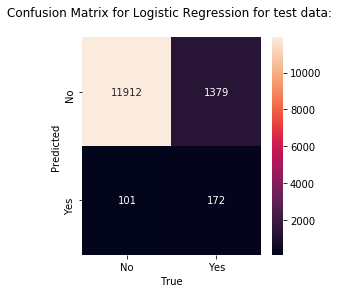

In [50]:
plt.figure(figsize = (4,4))
plt.title("Confusion Matrix for Logistic Regression for test data: \n")
ax=sns.heatmap(logreg_cm_test, annot=True,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [51]:
# summarize the fit of the model
logreg_accuracy = np.round( metrics.accuracy_score( y_test, pred_test ), 4 )
logreg_precision = np.round( metrics.precision_score( y_test, pred_test ), 4 )
logreg_recall    = np.round( metrics.recall_score( y_test, pred_test ), 4 )
logreg_f1score = np.round( metrics.f1_score( y_test, pred_test ), 4 )
print( 'Total Accuracy : ', logreg_accuracy)
print('\n') 
print('Metrics Classification Report for logistic regression\n',metrics.classification_report(y_test, pred_test))

Total Accuracy :  0.8909


Metrics Classification Report for logistic regression
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.63      0.11      0.19      1551

    accuracy                           0.89     13564
   macro avg       0.76      0.55      0.57     13564
weighted avg       0.87      0.89      0.86     13564



# 5c.Gaussian Naive Bayes Model

In [107]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(x_train, y_train)

# Use score method to get accuracy of train model
NB_train_score = model.score(x_train, y_train)
print('Train Accuracy Score:', np.round((NB_train_score),4))

# Use score method to get accuracy of test model
NB_test_score = model.score(x_test, y_test)
print('Test Accuracy Score:', np.round((NB_test_score),4))

Train Accuracy Score: 0.7742
Test Accuracy Score: 0.7794


In [108]:
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
logit_roc_auc

0.6334608064560191

In [53]:
#Predict for train set
pred_train_NB = model.predict(x_train)

#Confusion Matrix
NB_cm_train = pd.DataFrame(confusion_matrix(y_train,pred_train_NB).T,index=['No', 'Yes'], columns=['No', 'Yes'])
NB_cm_train.index.name = "Predicted"
NB_cm_train.columns.name = "True"
NB_cm_train

True,No,Yes
Predicted,,
No,22825,2061
Yes,5084,1677


In [54]:
# make predictions
pred_test_NB = model.predict(x_test)

#Confusion Matrix
NB_cm_test = pd.DataFrame(confusion_matrix(y_test,pred_test_NB).T,index=['No', 'Yes'], columns=['No', 'Yes'])
NB_cm_test.index.name = "Predicted"
NB_cm_test.columns.name = "True"
NB_cm_test

True,No,Yes
Predicted,,
No,9883,862
Yes,2130,689


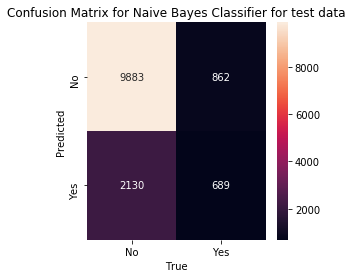

In [55]:
plt.figure(figsize = (4,4))
plt.title("Confusion Matrix for Naive Bayes Classifier for test data")
ax=sns.heatmap(NB_cm_test, annot=True,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [56]:
# summarize the fit of the model
NB_accuracy = np.round( metrics.accuracy_score( y_test, pred_test_NB ), 4 )
NB_precision = np.round( metrics.precision_score( y_test, pred_test_NB ), 4 )
NB_recall    = np.round( metrics.recall_score( y_test, pred_test_NB ), 4 )
NB_f1score = np.round( metrics.f1_score( y_test, pred_test_NB ), 4 )
print( 'Total Accuracy : ', NB_accuracy)
print('\n')
print('Metrics Classification Report for Naive bayes:\n', metrics.classification_report(y_test, pred_test_NB))

Total Accuracy :  0.7794


Metrics Classification Report for Naive bayes:
               precision    recall  f1-score   support

           0       0.92      0.82      0.87     12013
           1       0.24      0.44      0.32      1551

    accuracy                           0.78     13564
   macro avg       0.58      0.63      0.59     13564
weighted avg       0.84      0.78      0.81     13564



# 5d. K-Nearest Neighbours Classification

In [59]:
# creating odd list of K for KNN
myList = list(range(1,30))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [61]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5..30
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    # predict the response
    y_pred = knn.predict(x_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 23


In [62]:
# Invoking the KNN function to create the model
# fitting the model in the training data set

NNH = KNeighborsClassifier(n_neighbors= optimal_k , weights = 'distance')
NNH.fit(x_train, y_train)

# Use score method to get accuracy of train model
KNN_train_score = NNH.score(x_train, y_train)
print('Train Accuracy Score:', np.round((KNN_train_score),4))

# Use score method to get accuracy of test model
KNN_test_score = NNH.score(x_test, y_test)
print('Test Accuracy Score:', np.round((KNN_test_score),4))

Train Accuracy Score: 1.0
Test Accuracy Score: 0.8904


In [63]:
#Predict for train set
pred_train_KNN = NNH.predict(x_train)

#Confusion Matrix
KNN_cm_train = pd.DataFrame(confusion_matrix(y_train,pred_train_KNN).T,index=['No', 'Yes'], columns=['No', 'Yes'])
KNN_cm_train.index.name = "Predicted"
KNN_cm_train.columns.name = "True"
KNN_cm_train

True,No,Yes
Predicted,,
No,27909,0
Yes,0,3738


In [64]:
#make predictions for test set
pred_test_KNN = NNH.predict(x_test)


#Confusion Matrix
KNN_cm_test = pd.DataFrame(confusion_matrix(y_test,pred_test_KNN).T,index=['No', 'Yes'], columns=['No', 'Yes'])
KNN_cm_test.index.name = "Predicted"
KNN_cm_test.columns.name = "True"
KNN_cm_test

True,No,Yes
Predicted,,
No,11915,1389
Yes,98,162


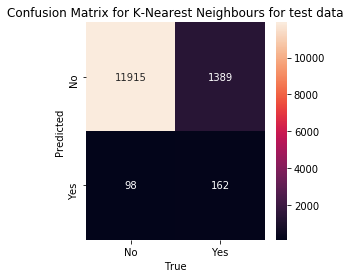

In [65]:
plt.figure(figsize = (4,4))
plt.title("Confusion Matrix for K-Nearest Neighbours for test data")
ax=sns.heatmap(KNN_cm_test, annot=True,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [66]:
# summarize the fit of the model
KNN_accuracy = np.round( metrics.accuracy_score( y_test, pred_test_KNN ), 4 )
KNN_precision = np.round( metrics.precision_score( y_test, pred_test_KNN ), 4 )
KNN_recall    = np.round( metrics.recall_score( y_test, pred_test_KNN ), 4 )
KNN_f1score = np.round( metrics.f1_score( y_test, pred_test_KNN ), 4 )
print( 'Total Accuracy : ', KNN_accuracy )
print('\n')
print('Metrics Classification Report for KNN: \n', metrics.classification_report(y_test, pred_test_KNN))

Total Accuracy :  0.8904


Metrics Classification Report for KNN: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.62      0.10      0.18      1551

    accuracy                           0.89     13564
   macro avg       0.76      0.55      0.56     13564
weighted avg       0.86      0.89      0.85     13564



In [67]:
resultsDf = pd.DataFrame({'Model': ['Decision Tree','Logistic Regression','Naive Bayes','KNN'], 
                              'Training Set Accuracy': [dtreeR_train_score, logreg_train_score, NB_train_score, KNN_train_score],
                              'Testing Set Accuracy': [dtreeR_test_score, logreg_test_score, NB_test_score, KNN_test_score],
                              'Model Accuracy': [dtreeR_accuracy, logreg_accuracy, NB_accuracy, KNN_accuracy],
                              'Precision': [dtreeR_precision, logreg_precision, NB_precision, KNN_precision],
                              'Recall': [dtreeR_recall, logreg_recall, NB_recall, KNN_recall],
                              'F1-score': [dtreeR_f1score, logreg_f1score, NB_f1score, KNN_f1score]})
resultsDf

,Model,Training Set Accuracy,Testing Set Accuracy,Model Accuracy,Precision,Recall,F1-score
0,Decision Tree,0.892200,0.895800,0.8958,0.6532,0.1883,0.2923
1,Logistic Regression,0.887477,0.890888,0.8909,0.6300,0.1109,0.1886
2,Naive Bayes,0.774228,0.779416,0.7794,0.2444,0.4442,0.3153
3,KNN,1.000000,0.890372,0.8904,0.6231,0.1044,0.1789


From the above table, Decision tree has the highest overall model accuracy of 89.58%

Classification Accuracy is not at an advisable Metric for an highly imbalanced dataset which is evident in our case as Majority class:0 and Minority class:1, So AUC-ROC or F1 Score(highest Recall and Precision scores) or Recall score is a metric of choice for a Binary Classification problem during Class Imbalance.

When we compare the model using the F1-Score, we can see that the Naive Bayes Model has the hightest overall F1-Score of 0.31

# 6. Build the ensemble models and compare the results with the base models. Note: Random forest can be used only with Decision trees.

# 6a. Ensemble Learning - Bagging

In [68]:
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=100,random_state=1, oob_score=True)
bgcl = bgcl.fit(x_train, y_train)

In [69]:
# Use score method to get accuracy of train model
bgcl_train_score = bgcl.score(x_train, y_train)
print('Train Accuracy Score:', np.round((bgcl_train_score),4))

# Use score method to get accuracy of test model
bgcl_test_score = bgcl.score(x_test, y_test)
print('Test Accuracy Score:', np.round((bgcl_test_score),4))

Train Accuracy Score: 0.9999
Test Accuracy Score: 0.8903


In [70]:
#Predict for train set
pred_train_bgcl = bgcl.predict(x_train)

#Confusion Matrix
bgcl_cm_train = pd.DataFrame(confusion_matrix(y_train,pred_train_bgcl).T,index=['No', 'Yes'], columns=['No', 'Yes'])
bgcl_cm_train.index.name = "Predicted"
bgcl_cm_train.columns.name = "True"
bgcl_cm_train

True,No,Yes
Predicted,,
No,27909,2
Yes,0,3736


In [71]:
#make predictions for test set
pred_test_bgcl = bgcl.predict(x_test)

#Confusion Matrix
bgcl_cm_test = pd.DataFrame(confusion_matrix(y_test,pred_test_bgcl).T,index=['No', 'Yes'], columns=['No', 'Yes'])
bgcl_cm_test.index.name = "Predicted"
bgcl_cm_test.columns.name = "True"
bgcl_cm_test

True,No,Yes
Predicted,,
No,11699,1174
Yes,314,377


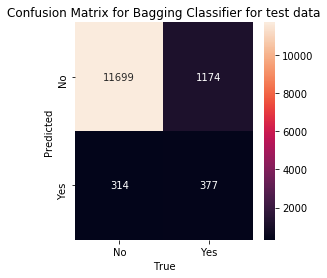

In [72]:
plt.figure(figsize = (4,4))
plt.title("Confusion Matrix for Bagging Classifier for test data")
ax=sns.heatmap(bgcl_cm_test, annot=True,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [73]:
# summarize the fit of the model

bgcl_accuracy = np.round( metrics.accuracy_score( y_test, pred_test_bgcl ), 4 )
bgcl_precision = np.round( metrics.precision_score( y_test, pred_test_bgcl ), 4 )
bgcl_recall    = np.round( metrics.recall_score( y_test, pred_test_bgcl ), 4 )
bgcl_f1score = np.round( metrics.f1_score( y_test, pred_test_bgcl ), 4 )
print( 'Total Accuracy : ', bgcl_accuracy )
print('\n')
print('Metrics Classification Report for Bagging Classifier: \n', metrics.classification_report(y_test, pred_test_bgcl))

Total Accuracy :  0.8903


Metrics Classification Report for Bagging Classifier: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     12013
           1       0.55      0.24      0.34      1551

    accuracy                           0.89     13564
   macro avg       0.73      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564



# 6b. Ensemble Learning - AdaBoosting

In [74]:
abcl = AdaBoostClassifier(n_estimators=50, random_state=1)
abcl = abcl.fit(x_train, y_train)

In [75]:
# Use score method to get accuracy of train model
abcl_train_score = abcl.score(x_train, y_train)
print('Train Accuracy Score:', np.round((abcl_train_score),4))

# Use score method to get accuracy of test model
abcl_test_score = abcl.score(x_test, y_test)
print('Test Accuracy Score:', np.round((abcl_test_score),4))

Train Accuracy Score: 0.8914
Test Accuracy Score: 0.893


In [76]:
#Predict for train set
pred_train_abcl =abcl.predict(x_train)

#Confusion Matrix
abcl_cm_train = pd.DataFrame(confusion_matrix(y_train,pred_train_abcl).T,index=['No', 'Yes'], columns=['No', 'Yes'])
abcl_cm_train.index.name = "Predicted"
abcl_cm_train.columns.name = "True"
abcl_cm_train

True,No,Yes
Predicted,,
No,27529,3057
Yes,380,681


In [77]:
#make predictions for test set
pred_test_abcl = abcl.predict(x_test)

#Confusion Matrix
abcl_cm_test = pd.DataFrame(confusion_matrix(y_test,pred_test_abcl).T,index=['No', 'Yes'], columns=['No', 'Yes'])
abcl_cm_test.index.name = "Predicted"
abcl_cm_test.columns.name = "True"
abcl_cm_test

True,No,Yes
Predicted,,
No,11834,1273
Yes,179,278


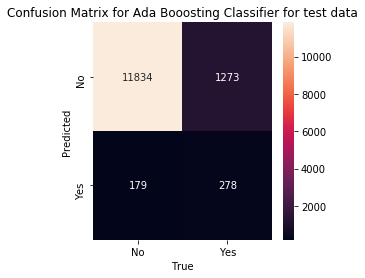

In [78]:
plt.figure(figsize = (4,4))
plt.title("Confusion Matrix for Ada Booosting Classifier for test data")
ax=sns.heatmap(abcl_cm_test, annot=True,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [79]:
# summarize the fit of the model

abcl_accuracy = np.round( metrics.accuracy_score( y_test, pred_test_abcl ), 4 )
abcl_precision = np.round( metrics.precision_score( y_test, pred_test_abcl ), 4 )
abcl_recall    = np.round( metrics.recall_score( y_test, pred_test_abcl ), 4 )
abcl_f1score = np.round( metrics.f1_score( y_test, pred_test_abcl ), 4 )
print( 'Total Accuracy : ', abcl_accuracy )
print('\n')
print('Metrics Classification Report for Ada Boosting Classifier: \n', metrics.classification_report(y_test, pred_test_abcl))

Total Accuracy :  0.893


Metrics Classification Report for Ada Boosting Classifier: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.61      0.18      0.28      1551

    accuracy                           0.89     13564
   macro avg       0.76      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564



# 6c. Ensemble Learning - Gradient Boosting

In [80]:
gbcl = GradientBoostingClassifier(n_estimators =50,random_state=1,learning_rate = .05)
gbcl = gbcl.fit(x_train, y_train)

In [81]:
# Use score method to get accuracy of train model
gbcl_train_score = gbcl.score(x_train, y_train)
print('Train Accuracy Score:', np.round((gbcl_train_score),4))

# Use score method to get accuracy of test model
gbcl_test_score = gbcl.score(x_test, y_test)
print('Test Accuracy Score:', np.round((gbcl_test_score),4))

Train Accuracy Score: 0.8938
Test Accuracy Score: 0.896


In [82]:
#Predict for train set
pred_train_gbcl =gbcl.predict(x_train)

#Confusion Matrix
gbcl_cm_train = pd.DataFrame(confusion_matrix(y_train,pred_train_gbcl).T,index=['No', 'Yes'], columns=['No', 'Yes'])
gbcl_cm_train.index.name = "Predicted"
gbcl_cm_train.columns.name = "True"
gbcl_cm_train

True,No,Yes
Predicted,,
No,27678,3130
Yes,231,608


In [83]:
#make predictions for test set
pred_test_gbcl = gbcl.predict(x_test)

#Confusion Matrix
gbcl_cm_test = pd.DataFrame(confusion_matrix(y_test,pred_test_gbcl).T,index=['No', 'Yes'], columns=['No', 'Yes'])
gbcl_cm_test.index.name = "Predicted"
gbcl_cm_test.columns.name = "True"
gbcl_cm_test

True,No,Yes
Predicted,,
No,11896,1293
Yes,117,258


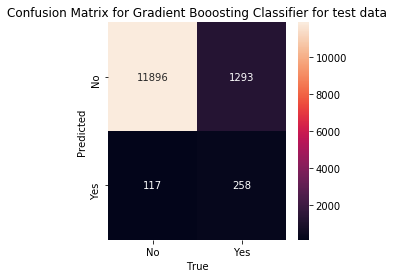

In [84]:
plt.figure(figsize = (4,4))
plt.title("Confusion Matrix for Gradient Booosting Classifier for test data")
ax=sns.heatmap(gbcl_cm_test, annot=True,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [85]:
# summarize the fit of the model
gbcl_accuracy = np.round( metrics.accuracy_score( y_test, pred_test_gbcl ), 4 )
gbcl_precision = np.round( metrics.precision_score( y_test, pred_test_gbcl ), 4 )
gbcl_recall    = np.round( metrics.recall_score( y_test, pred_test_gbcl ), 4 )
gbcl_f1score = np.round( metrics.f1_score( y_test, pred_test_gbcl ), 4 )
print( 'Total Accuracy : ', gbcl_accuracy )
print('\n')
print('Metrics Classification Report for Gradient Boosting Classifier: \n', metrics.classification_report(y_test, pred_test_gbcl))

Total Accuracy :  0.896


Metrics Classification Report for Gradient Boosting Classifier: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.69      0.17      0.27      1551

    accuracy                           0.90     13564
   macro avg       0.79      0.58      0.61     13564
weighted avg       0.88      0.90      0.87     13564



# 6d. Ensemble Random Forests Classifier

In [86]:
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(x_train, y_train)

In [87]:
# Use score method to get accuracy of train model
rfcl_train_score = rfcl.score(x_train, y_train)
print('Train Accuracy Score:', np.round((rfcl_train_score),4))
 
# Use score method to get accuracy of test model
rfcl_test_score = rfcl.score(x_test, y_test)
print('Test Accuracy Score:', np.round((rfcl_test_score),4))

Train Accuracy Score: 0.9991
Test Accuracy Score: 0.893


In [88]:
#Predict for train set
pred_train_rfcl =rfcl.predict(x_train)

#Confusion Matrix
rfcl_cm_train = pd.DataFrame(confusion_matrix(y_train,pred_train_rfcl).T,index=['No', 'Yes'], columns=['No', 'Yes'])
rfcl_cm_train.index.name = "Predicted"
rfcl_cm_train.columns.name = "True"
rfcl_cm_train

True,No,Yes
Predicted,,
No,27909,29
Yes,0,3709


In [89]:
#make predictions for test set
pred_test_rfcl = rfcl.predict(x_test)

#Confusion Matrix
rfcl_cm_test = pd.DataFrame(confusion_matrix(y_test,pred_test_rfcl).T,index=['No', 'Yes'], columns=['No', 'Yes'])
rfcl_cm_test.index.name = "Predicted"
rfcl_cm_test.columns.name = "True"
rfcl_cm_test

True,No,Yes
Predicted,,
No,11745,1184
Yes,268,367


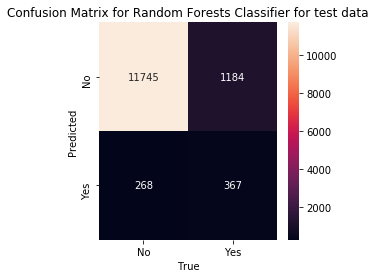

In [90]:
plt.figure(figsize = (4,4))
plt.title("Confusion Matrix for Random Forests Classifier for test data")
ax=sns.heatmap(rfcl_cm_test, annot=True,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [91]:
# summarize the fit of the model
rfcl_accuracy = np.round( metrics.accuracy_score( y_test, pred_test_rfcl ), 4 )
rfcl_precision = np.round( metrics.precision_score( y_test, pred_test_rfcl ), 4 )
rfcl_recall    = np.round( metrics.recall_score( y_test, pred_test_rfcl ), 4 )
rfcl_f1score = np.round( metrics.f1_score( y_test, pred_test_rfcl ), 4 )
print( 'Total Accuracy : ',rfcl_accuracy )
print('\n')
print('Metrics Classification Report for Random Forest Classifier: \n', metrics.classification_report(y_test, pred_test_rfcl))

Total Accuracy :  0.893


Metrics Classification Report for Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.58      0.24      0.34      1551

    accuracy                           0.89     13564
   macro avg       0.74      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564



# 7. Compare performances of all the models 

In [92]:
resultsDf = pd.DataFrame({'Model': ['Decision Tree','Logistic Regression','Naive Bayes','KNN','Bagging','Ada Boosting','Gradient Boosting','Random Forest'], 
                              'Training Set Accuracy': [dtreeR_train_score, logreg_train_score, NB_train_score, KNN_train_score,bgcl_train_score,abcl_train_score,gbcl_train_score,rfcl_train_score],
                              'Testing Set Accuracy': [dtreeR_test_score, logreg_test_score, NB_test_score, KNN_test_score,bgcl_test_score,abcl_test_score,gbcl_test_score,rfcl_test_score],
                              'Model Accuracy': [dtreeR_accuracy, logreg_accuracy, NB_accuracy, KNN_accuracy,bgcl_accuracy,abcl_accuracy,gbcl_accuracy,rfcl_accuracy],
                              'Precision': [dtreeR_precision, logreg_precision, NB_precision, KNN_precision,bgcl_precision,abcl_precision,gbcl_precision,rfcl_precision],
                              'Recall': [dtreeR_recall, logreg_recall, NB_recall, KNN_recall,bgcl_recall,abcl_recall,gbcl_recall,rfcl_recall],
                              'F1-score': [dtreeR_f1score, logreg_f1score, NB_f1score, KNN_f1score,bgcl_f1score,abcl_f1score,gbcl_f1score,rfcl_f1score]})
resultsDf

,Model,Training Set Accuracy,Testing Set Accuracy,Model Accuracy,Precision,Recall,F1-score
0,Decision Tree,0.892200,0.895800,0.8958,0.6532,0.1883,0.2923
1,Logistic Regression,0.887477,0.890888,0.8909,0.6300,0.1109,0.1886
2,Naive Bayes,0.774228,0.779416,0.7794,0.2444,0.4442,0.3153
3,KNN,1.000000,0.890372,0.8904,0.6231,0.1044,0.1789
4,Bagging,0.999937,0.890298,0.8903,0.5456,0.2431,0.3363
5,Ada Boosting,0.891396,0.892952,0.8930,0.6083,0.1792,0.2769
6,Gradient Boosting,0.893797,0.896048,0.8960,0.6880,0.1663,0.2679
7,Random Forest,0.999084,0.892952,0.8930,0.5780,0.2366,0.3358


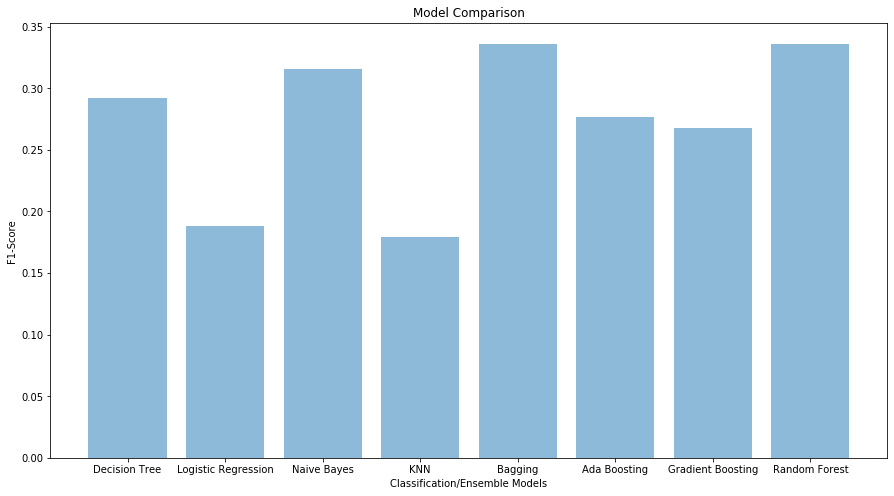

In [102]:
plt.figure(figsize = (15,8))
plt.bar(resultsDf['Model'],resultsDf['F1-score'],align='center',alpha=0.5)
plt.title("Model Comparison")
plt.xlabel("Classification/Ensemble Models")
plt.ylabel("F1-Score")
plt.show()

From the above table, Gradient Boosting has the highest overall model accuracy of 89.6%             

Classification Accuracy is not at an advisable Metric for an highly imbalanced dataset which is evident in our case as Majority class:0 and Minority class:1, So AUC-ROC or F1 Score(highest Recall and Precision scores) or Recall score is a metric of choice for a Binary Classification problem during Class Imbalance.
When we compare the model using the F1-Score, we can see that the Ensemble Technique has better F1-Score when compare to the other models and the Bagging has the hightest overall F1-Score of 0.3363